# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [4]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data
    X_train_centered = X_train - np.mean(X_train, axis=0)
    X_test_centered = X_test - np.mean(X_train, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(X_train_centered, rowvar=False)

    # Initialize matrix to store eigenvectors
    eigenvectors = np.zeros((X_train.shape[1], n_components))

    # Power iteration method to compute eigenvectors
    for i in range(n_components):
        # Initialize a random vector
        v = np.random.rand(X_train.shape[1])
        v = v / np.linalg.norm(v)

        for _ in range(100):  # Number of iterations
            v_new = np.dot(covariance_matrix, v)
            v_new = v_new / np.linalg.norm(v_new)

            if np.allclose(v, v_new):
                break

            v = v_new

        eigenvectors[:, i] = v

        # Deflate the covariance matrix
        covariance_matrix -= np.dot(np.outer(v, v), covariance_matrix)

    # Project data onto the new space
    X_train_svd = np.dot(X_train_centered, eigenvectors)
    X_test_svd = np.dot(X_test_centered, eigenvectors)

    return X_train_svd, X_test_svd, eigenvectors



    # raise NotImplementedError("Your implementation here...")

## Part 3: Train Logistic Regression and Measure Performance

In [5]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [7]:
svd_components = [784, 500, 300, 100, 50, 20]  # You need to decide what number to search...

# Store the results
results = []
all_eigenvectors = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, eigenvectors = apply_svd_custom(X_train,X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))
    all_eigenvectors.append(eigenvectors)

    # Use the last set of eigenvectors for visualization (highest number of components)
    eigenvectors = all_eigenvectors[-1]


    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9203, Training time: 1039.5594 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 343.4922 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9204, Training time: 164.1499 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9178, Training time: 46.0155 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9087, Training time: 14.2571 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 4.0557 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


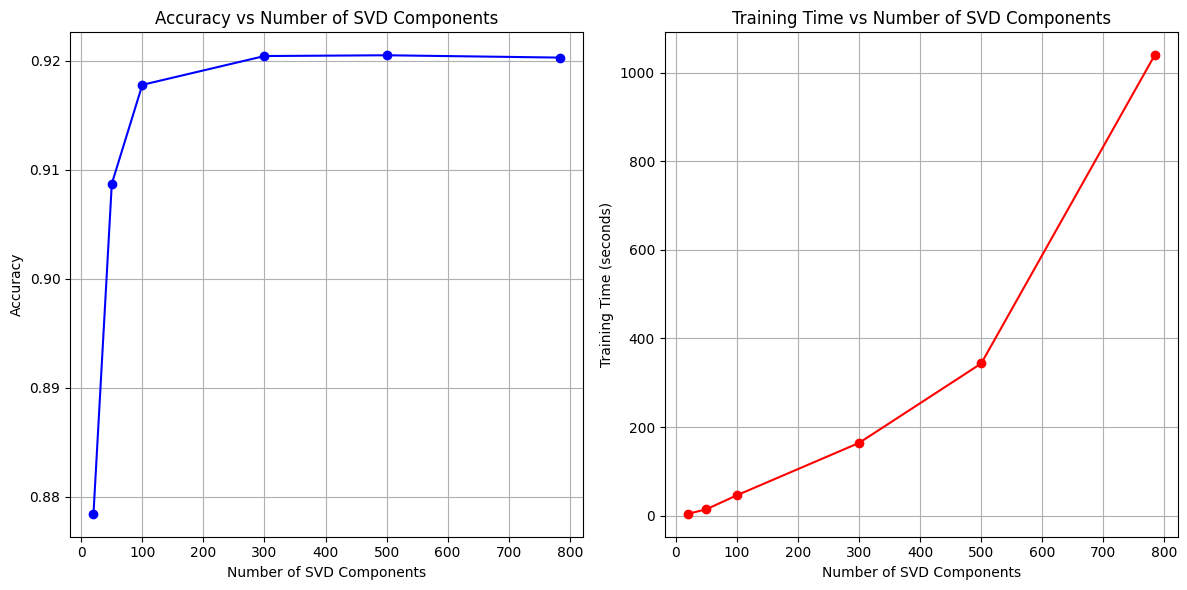

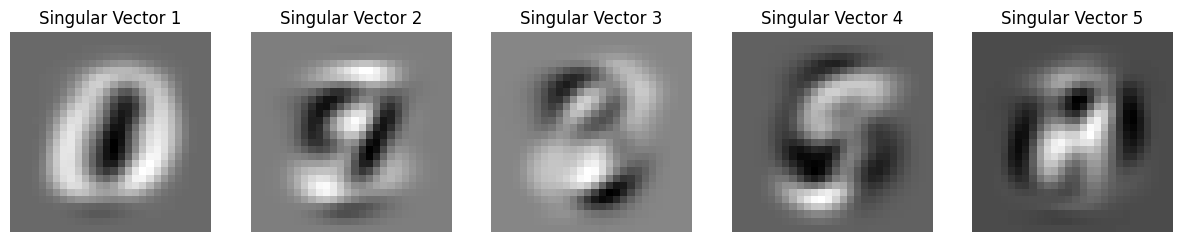

In [12]:
import matplotlib.pyplot as plt

# Function to visualize accuracy and training time as a function of SVD components
def visualize_results(results):
    # Extract the number of components, accuracy values, and training times from the results list
    components = [r[0] for r in results]
    accuracies = [r[1] for r in results]
    training_times = [r[2] for r in results]

    # Create a figure with 2 subplots for visualizing accuracy and training time
    plt.figure(figsize=(12, 6))

    # Plot Accuracy vs SVD Components
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.plot(components, accuracies, marker='o', color='b')  # Plot accuracy as blue dots connected by lines
    plt.title('Accuracy vs Number of SVD Components')  # Add title to the plot
    plt.xlabel('Number of SVD Components')  # Label for the x-axis
    plt.ylabel('Accuracy')  # Label for the y-axis
    plt.grid(True)  # Add grid lines for better readability

    # Plot Training Time vs SVD Components
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.plot(components, training_times, marker='o', color='r')  # Plot training time as red dots connected by lines
    plt.title('Training Time vs Number of SVD Components')  # Add title to the plot
    plt.xlabel('Number of SVD Components')  # Label for the x-axis
    plt.ylabel('Training Time (seconds)')  # Label for the y-axis
    plt.grid(True)  # Add grid lines for better readability

    # Adjust layout to ensure subplots are well spaced and displayed
    plt.tight_layout()
    plt.show()  # Display the plot

# Function to visualize the top 5 singular vectors (principal components)
def visualize_singular_vectors(singular_vectors):
    # Create subplots to display the top 5 singular vectors
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 columns for 5 images

    for i in range(5):
        # Reshape the singular vectors (784 dimensions) into 28x28 pixel images for visualization
        img = singular_vectors[:, i][:784].reshape(28, 28)  # Reshape first 784 elements to a 28x28 image
        axs[i].imshow(img, cmap='gray')  # Display the singular vector as a grayscale image
        axs[i].set_title(f'Singular Vector {i+1}')  # Set title for each subplot
        axs[i].axis('off')  # Turn off axis labels for clarity

    # Show the singular vector images
    plt.show()

# Visualize accuracy and training time plots based on the SVD results
visualize_results(results)

# To visualize the top 5 singular vectors, extract them from the SVD applied with full components
_, _, top_singular_vectors = apply_svd_custom(X_train, X_test, 784)  # Compute SVD with all components (784)
visualize_singular_vectors(top_singular_vectors)  # Visualize the top 5 singular vectors

## Part 6: Analyze / Conclusion

YOUR ANSWER: When looking at the accuracy graph, we can see that as the number of SVD components increases, the accuracy of the model improves. This suggests that incorporating more components allows the model to capture more variance from the data, leading to better performance. However, the training time increases as the number of SVD components increases. This is expected since more components require more computational resources and time to process. After 300 components, there is little improvement in accuracy. This suggests that most of the important information for classification is captured within the first 100–300 components. In summary, SVD improves model performance by capturing essential data features, but careful consideration is needed to balance accuracy gains with computational efficiency.